<a href="https://colab.research.google.com/github/riyansmiha/Number_Combined_Hand_Gesture/blob/main/Number_Combined_Hand_Gesture(VGG19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Download a file based on its file ID.
#https://drive.google.com/file/d/101FRYiSaH3PH73wNIbDrcTVSdKS7_AD4/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '101FRYiSaH3PH73wNIbDrcTVSdKS7_AD4'
downloaded = drive.CreateFile({'id': file_id})

In [5]:
downloaded.GetContentFile('Number.tar')

In [6]:
!tar xvf Number.tar

Number/
Number/0/
Number/0/18 (177).jpg
Number/0/18 (178).jpg
Number/0/18 (179).jpg
Number/0/18 (180).jpg
Number/0/18 (181).jpg
Number/0/18 (182).jpg
Number/0/18 (183).jpg
Number/0/18 (184).jpg
Number/0/18 (185).jpg
Number/0/18 (186).jpg
Number/0/18 (187).jpg
Number/0/18 (24).jpg
Number/0/18 (25).jpg
Number/0/18 (26).jpg
Number/0/18 (27).jpg
Number/0/18 (28).jpg
Number/0/18 (29).jpg
Number/0/18 (30).jpg
Number/0/18 (31).jpg
Number/0/18 (32).jpg
Number/0/18 (33).jpg
Number/0/3372.jpg
Number/0/3373.jpg
Number/0/3374.jpg
Number/0/3375.jpg
Number/0/3376.jpg
Number/0/3377.jpg
Number/0/3378.jpg
Number/0/3379.jpg
Number/0/3380.jpg
Number/0/3381.jpg
Number/0/3382.jpg
Number/0/3383.jpg
Number/0/3384.jpg
Number/0/3385.jpg
Number/0/3386.jpg
Number/0/3387.jpg
Number/0/3388.jpg
Number/0/3389.jpg
Number/0/3390.jpg
Number/0/3391.jpg
Number/0/3392.jpg
Number/0/3393.jpg
Number/0/3394.jpg
Number/0/3395.jpg
Number/0/3396.jpg
Number/0/3397.jpg
Number/0/3398.jpg
Number/0/3399.jpg
Number/0/3400.jpg
Number/0

In [7]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os

In [8]:
num_classes = 10
img_rows, img_cols = 225, 225
batch_size = 32

In [9]:
PATH = '/content/Number'

In [10]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  10 classes:
 ['5', '9', '1', '3', '8', '6', '2', '0', '7', '4']


In [11]:
from fastai.vision import *
from fastai.metrics import error_rate

In [12]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: 5


Class: 9


Class: 1


Class: 3


Class: 8


Class: 6


Class: 2


Class: 0


Class: 7


Class: 4


In [13]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=225, bs=32, valid_pct=0.2).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  return _solve_func(B,A)[0][:,0]


In [14]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 1016 training images and 254 validation images.


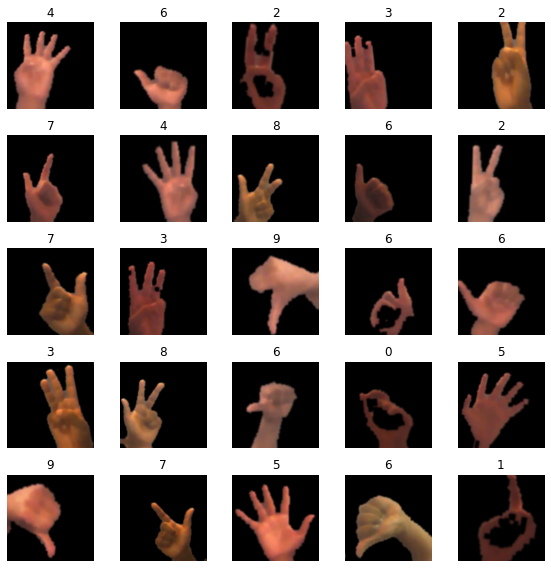

In [15]:
data.show_batch(rows=5, figsize=(8,8))

In [17]:
learn = cnn_learner(data, models.vgg11_bn, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


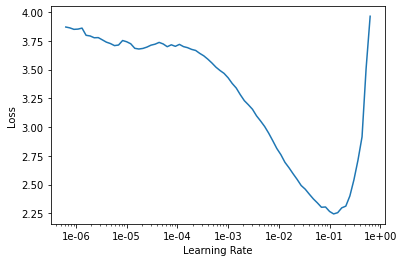

In [18]:
learn.lr_find();
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.408736,0.356420,0.885827,10:10
1,0.867706,0.211529,0.937008,10:12


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

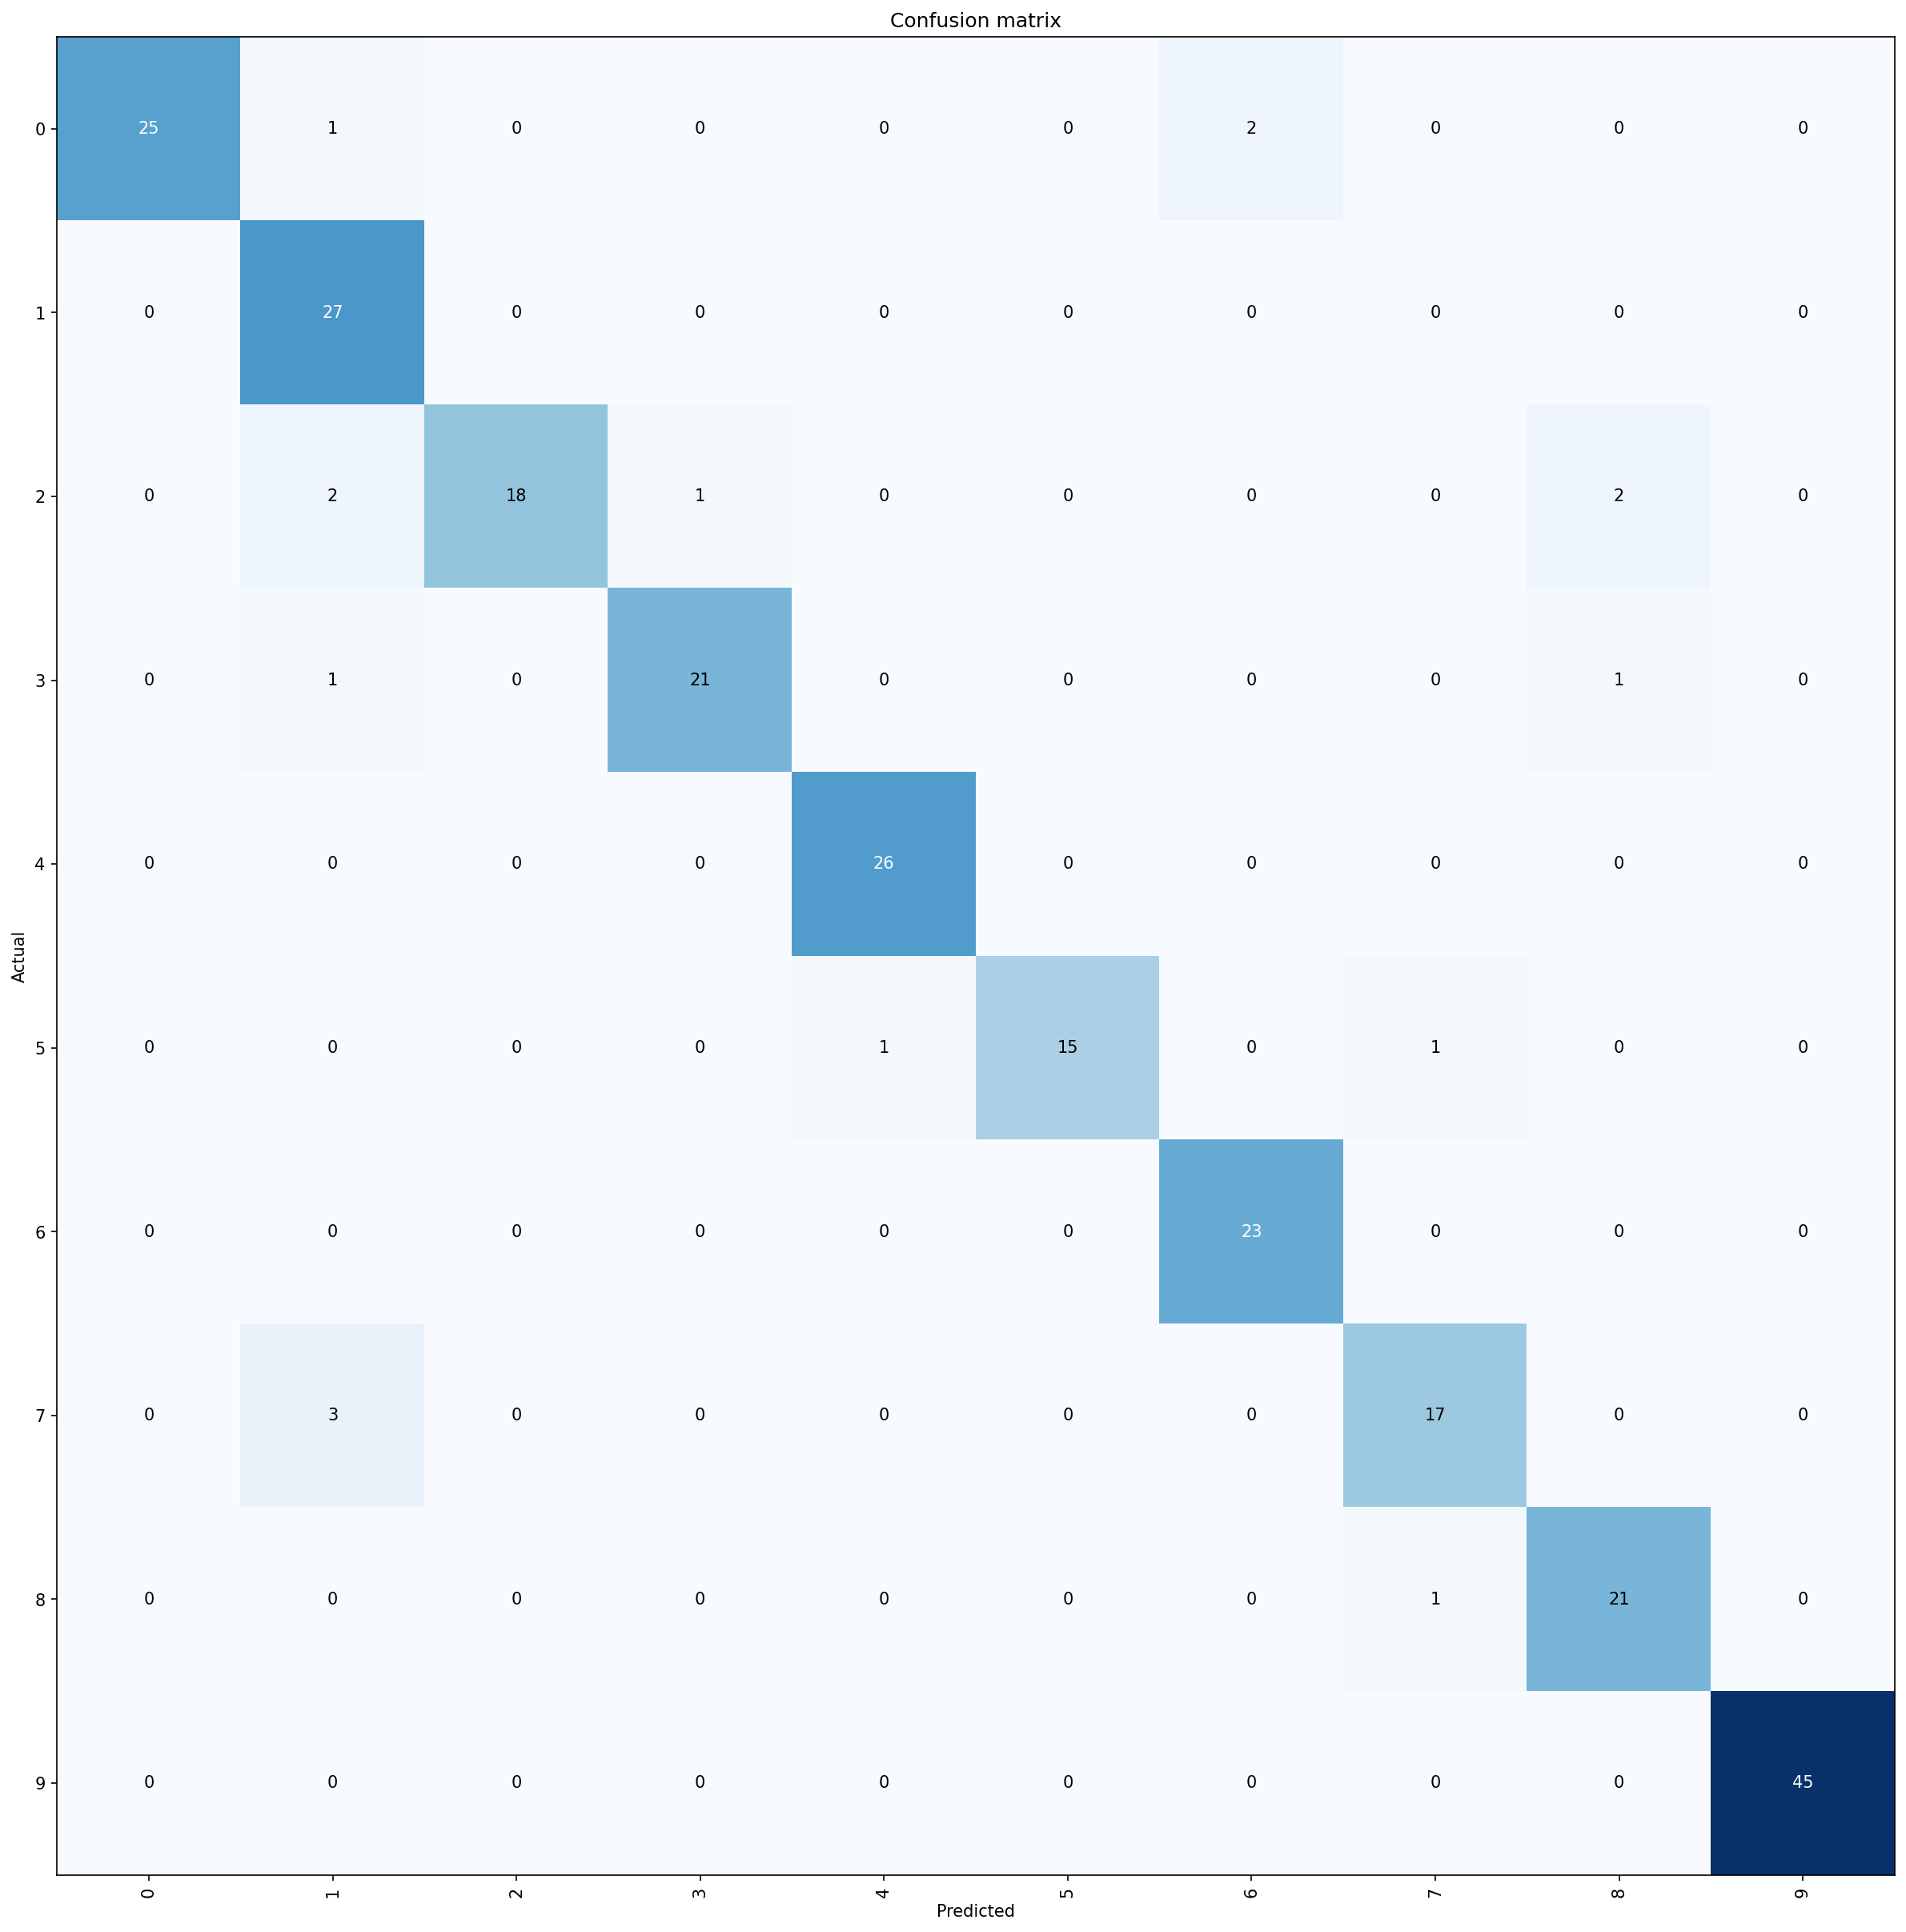

In [21]:
interp.plot_confusion_matrix(figsize=(16,16), dpi=150)

In [22]:
print(interp)

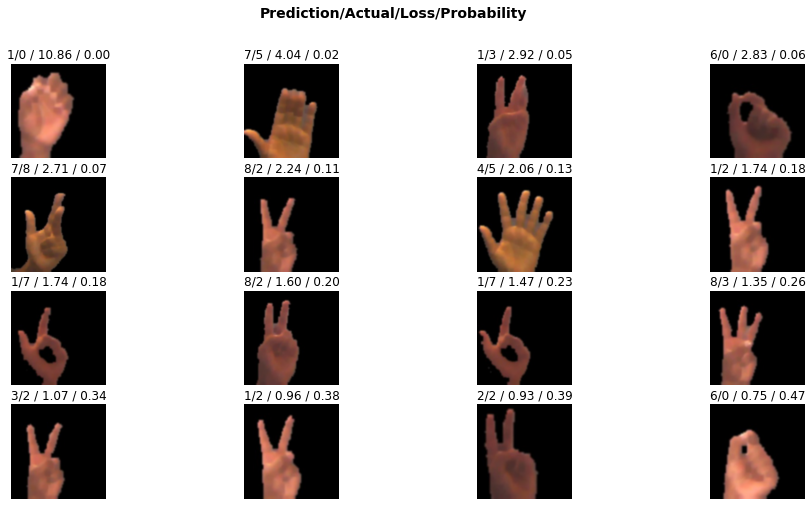

In [23]:
interp.plot_top_losses(16, figsize=(16,8), heatmap=False)